In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from PIL import Image
from numpy import asarray

from tensorflow import keras
from keras.utils import np_utils
from tensorflow.keras import datasets,layers, models

# CONNECT DENGAN DIRECTORY

In [2]:
base_dir = "blobs.fit/coba3/"
latih =  "fit.dataset/latih"
validasi = "fit.dataset/validasi"
testing = "fit.dataset/testing"
!ls "D:\TUGAS\Kuliah\Semester8\SourcesCode\SimulasiCNN\blobs.fit"

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
bahan_dir = os.path.join(base_dir)
train_dir = os.path.join(latih)
valid_dir = os.path.join(validasi)
test_dir = os.path.join(testing)

In [4]:
gradeA_dir = os.path.join(bahan_dir, 'gradeA/')
gradeB_dir = os.path.join(bahan_dir, 'gradeB/')
gradeC_dir = os.path.join(bahan_dir, 'gradeC/')

print("Jumlah data tiap kelas")
print("Jumlah gambar grade  A : ", len(os.listdir(gradeA_dir)))
print("Jumlah gambar grade  B : ", len(os.listdir(gradeB_dir)))
print("Jumlah gambar grade  C : ", len(os.listdir(gradeC_dir)))
print("Total dataset : ", len(os.listdir(gradeA_dir)) + len(os.listdir(gradeB_dir)) + len(os.listdir(gradeC_dir)))

Jumlah data tiap kelas
Jumlah gambar grade  A :  210
Jumlah gambar grade  B :  210
Jumlah gambar grade  C :  210
Total dataset :  630


In [5]:
# direktori isi latih/training
train_gradeA = os.path.join(train_dir, 'gradeA/')
train_gradeB = os.path.join(train_dir, 'gradeB/')
train_gradeC = os.path.join(train_dir, 'gradeC/')

# direktori isi validasi
valid_gradeA = os.path.join(valid_dir, 'gradeA/')
valid_gradeB = os.path.join(valid_dir, 'gradeB/')
valid_gradeC = os.path.join(valid_dir, 'gradeC/')

# direktori isi test
test_gradeA = os.path.join(test_dir, 'gradeA/')
test_gradeB = os.path.join(test_dir, 'gradeB/')
test_gradeC = os.path.join(test_dir, 'gradeC/')

# MEMBAGI DATASET MENJADI DATA TRAINING DAN DATA VALIDATION

In [ ]:
import random
from shutil import copyfile

def train_val_split(source, train, val, test, train_ratio, val_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = int(val_ratio * total_size)
  test_size = total_size - train_size - val_size

  randomized  = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files   = randomized[train_size:train_size+val_size]
  test_files = randomized[train_size+val_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)
  for i in test_files:
    i_file = source + i
    destination = test + i
    copyfile(i_file, destination)

# jumlah pembagian data training dan testing
train_ratio = 0.9
val_ratio = 0.05

#pembagian training dan validasi 
#gradeA
source_00 = gradeA_dir
train_00  = train_gradeA
val_00    = valid_gradeA
test_00   = test_gradeA
train_val_split(source_00, train_00, val_00, test_00, train_ratio, val_ratio )

#gradeB
source_01 = gradeB_dir
train_01  = train_gradeB
val_01    = valid_gradeB
test_01   = test_gradeB
train_val_split(source_01, train_01, val_01, test_01, train_ratio, val_ratio )

#gradeC
source_02 = gradeC_dir
train_02  = train_gradeC
val_02    = valid_gradeC
test_02   = test_gradeC
train_val_split(source_02, train_02, val_02, test_02, train_ratio, val_ratio)

In [ ]:
print("Jumlah all grade A   : ", len(os.listdir(gradeA_dir)))
print("Jumlah train grade A : ", len(os.listdir(train_gradeA)))
print("Jumlah validation grade A   : ", len(os.listdir(valid_gradeA)))
print("Jumlah testing grade A   : ", len(os.listdir(test_gradeA)))

print("\nJumlah all grade B   : ", len(os.listdir(gradeB_dir)))
print("Jumlah train grade B : ", len(os.listdir(train_gradeB)))
print("Jumlah validation grade B   : ", len(os.listdir(valid_gradeB)))
print("Jumlah testing grade B   : ", len(os.listdir(test_gradeB)))

print("\nJumlah all grade C   : ", len(os.listdir(gradeC_dir)))
print("Jumlah train grade C : ", len(os.listdir(train_gradeC)))
print("Jumlah validation grade C   : ", len(os.listdir(valid_gradeC)))
print("Jumlah testing grade C   : ", len(os.listdir(test_gradeC)))


# MOBILENET V2

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen       = ImageDataGenerator(
    rescale         = 1./255
)

val_datagen = ImageDataGenerator(
    rescale         = 1./255
)
test_datagen = ImageDataGenerator(
    rescale         = 1./255
)

In [7]:
IMG_SIZE = (128,128)
BATCH_SIZE = 32

# train_dir = os.path.join(base_dir, 'latih')
# validation_dir = os.path.join(base_dir, 'validasi')

# train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE, class_mode= 'categorical')
# validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE, class_mode= 'categorical')

train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    shuffle    = False,
    class_mode = 'categorical',
    color_mode = 'rgb'
)
valid_dataset = val_datagen.flow_from_directory(
    valid_dir,
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    shuffle    = False,
    class_mode = 'categorical',
    color_mode = 'rgb'
)
test_dataset = test_datagen.flow_from_directory(
    test_dir,
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    shuffle    = False,
    class_mode = 'categorical',
    color_mode = 'rgb'
)

Found 567 images belonging to 3 classes.


Found 30 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


In [8]:
IMG_SHAPE = IMG_SIZE + (3,)
MobileNetV2 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

for layer in MobileNetV2.layers:
    layer.trainable = False

# UJI COBA CUSTOM MODEL KE-1

In [9]:
x = MobileNetV2.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(3, activation='softmax')(x)
modelku = tf.keras.Model(inputs=MobileNetV2.input, outputs = output)

In [10]:
modelku.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']           

In [11]:
base_learning_rate = 0.0001
modelku.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                loss="categorical_crossentropy",
                metrics=['accuracy'])

In [12]:
history = modelku.fit(train_dataset, epochs=100, validation_data=valid_dataset)

Epoch 1/100
18/18 [==============================] - 9s 365ms/step - loss: 1.0614 - accuracy: 0.4339 - val_loss: 0.9855 - val_accuracy: 0.5000
Epoch 2/100
18/18 [==============================] - 3s 187ms/step - loss: 0.9813 - accuracy: 0.4868 - val_loss: 0.9269 - val_accuracy: 0.6333
Epoch 3/100
18/18 [==============================] - 4s 194ms/step - loss: 0.9317 - accuracy: 0.5697 - val_loss: 0.8824 - val_accuracy: 0.6667
Epoch 4/100
18/18 [==============================] - 3s 192ms/step - loss: 0.8955 - accuracy: 0.6825 - val_loss: 0.8433 - val_accuracy: 0.7333
Epoch 5/100
18/18 [==============================] - 4s 201ms/step - loss: 0.8624 - accuracy: 0.7460 - val_loss: 0.8124 - val_accuracy: 0.7333
Epoch 6/100
18/18 [==============================] - 4s 207ms/step - loss: 0.8297 - accuracy: 0.7690 - val_loss: 0.7765 - val_accuracy: 0.7667
Epoch 7/100
18/18 [==============================] - 4s 208ms/step - loss: 0.7903 - accuracy: 0.7707 - val_loss: 0.7507 - val_accuracy: 0.7667

# Training dan validation accurasi dan loss

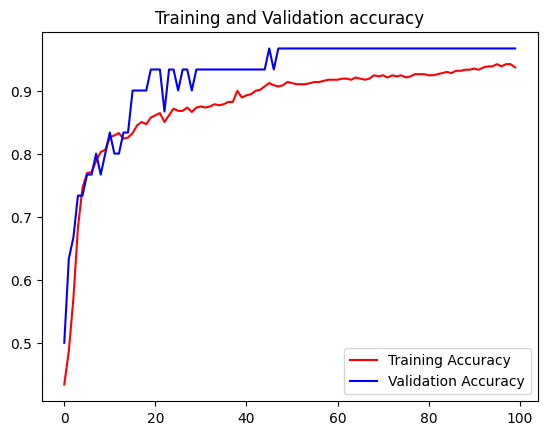

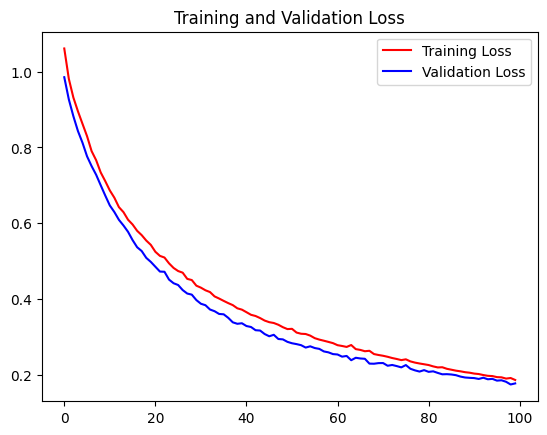

In [13]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='best')
plt.show()

# Menampilkan precission, recall, dan f1-score

# VALIDATION

In [14]:
import numpy as np
from sklearn.metrics import classification_report

# Evaluasi model
y_true = valid_dataset.classes
Y_pred = modelku.predict(valid_dataset, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# Tampilkan laporan klasifikasi
target_names = list(valid_dataset.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

1/1 [==============================] - 1s 1s/step
              precision    recall  f1-score   support

      GradeA       1.00      0.90      0.95        10
      GradeB       0.91      1.00      0.95        10
      GradeC       1.00      1.00      1.00        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



1/1 [==============================] - 0s 228ms/step


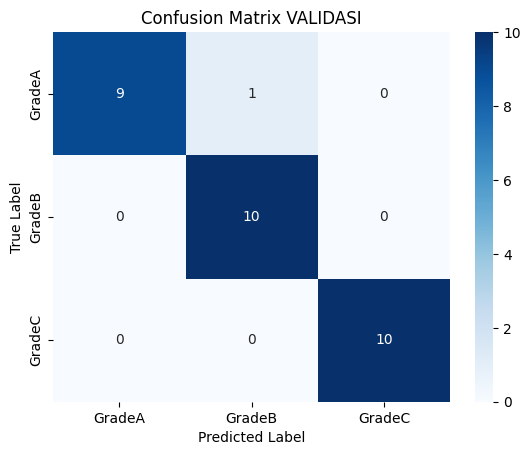

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_list = os.listdir(train_dir)

# membuat prediksi pada data validasi
y_pred = modelku.predict(valid_dataset)
y_pred = np.argmax(y_pred, axis=1)

# mengambil label yang sebenarnya
y_true = valid_dataset.classes

# membuat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# menampilkan confusion matrix dengan heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_list, yticklabels=class_list)
plt.title('Confusion Matrix VALIDASI')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# TESTING

2/2 [==============================] - 0s 15ms/step


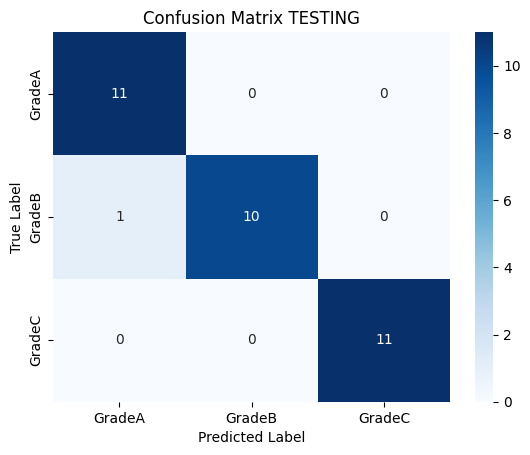

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_list = os.listdir(train_dir)

# membuat prediksi pada data validasi
y_pred = modelku.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

# mengambil label yang sebenarnya
y_true = test_dataset.classes

# membuat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# menampilkan confusion matrix dengan heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_list, yticklabels=class_list)
plt.title('Confusion Matrix TESTING')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [17]:
import numpy as np
from sklearn.metrics import classification_report

# Evaluasi model
y_true = test_dataset.classes
Y_pred = modelku.predict(test_dataset, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# Tampilkan laporan klasifikasi
target_names = list(test_dataset.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

2/2 [==============================] - 0s 16ms/step
              precision    recall  f1-score   support

      gradeA       0.92      1.00      0.96        11
      gradeB       1.00      0.91      0.95        11
      gradeC       1.00      1.00      1.00        11

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



# SAVE MODEL

In [18]:
modelku.save('model/FIT_coba3_BL00001_no-dropout.h5')

# Export TFLITE

In [19]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('model\FIT_coba3_BL00001_no-dropout.h5')

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('tflite/FIT_coba3_BL00001_no-dropout.tflite', 'wb') as f:
    f.write(tflite_model)

# # Convert the model
# converter = tf.lite.TFLiteConverter.from_saved_model("model\modelku-fit_data-baru_59.h5") # path to the SavedModel directory
# tflite_model = converter.convert()

# # Save the model.
# with open('export-3_blob-fit_no-dropout_59-quant.tflite', 'wb') as f:
#   f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ronal\AppData\Local\Temp\tmpntaj24yd\assets


INFO:tensorflow:Assets written to: C:\Users\ronal\AppData\Local\Temp\tmpntaj24yd\assets


# TES Klasifikasi

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

class_list = os.listdir(train_dir)

img_path = 'validasi\GradeB\imageB_432977.bmp'
img = image.load_img(img_path, target_size=(128, 128))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds = modelku.predict(x)
class_idx = np.argmax(preds[0])
class_label = class_list[class_idx]

imgplot = plt.imshow(img)
plt.title(f'Predicted Class: {class_label}')
plt.axis('off')
plt.show()